In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [4]:
data.shape

(400, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
feature_cols = ('CompPrice','Income','Advertising','Population','Price','Age','Education')

In [10]:
data.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [11]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

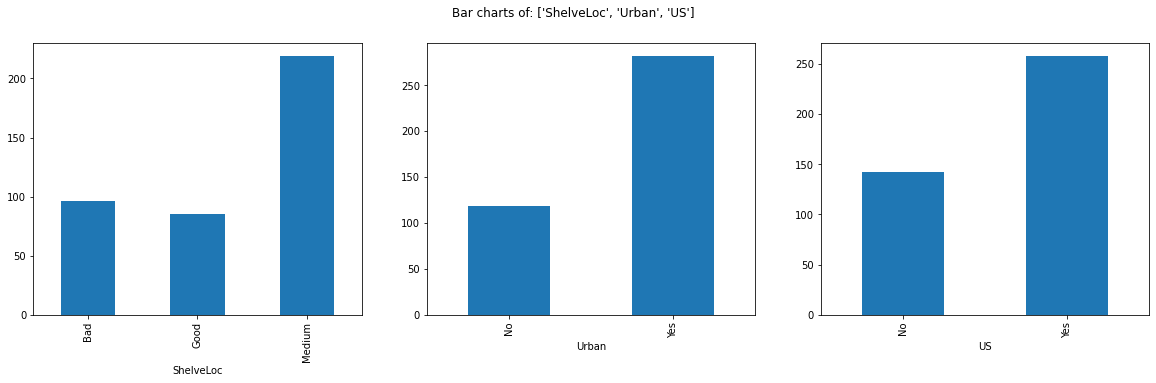

In [12]:
PlotBarCharts(inpData=data, 
              colsToPlot=['ShelveLoc', 'Urban', 'US'])


array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

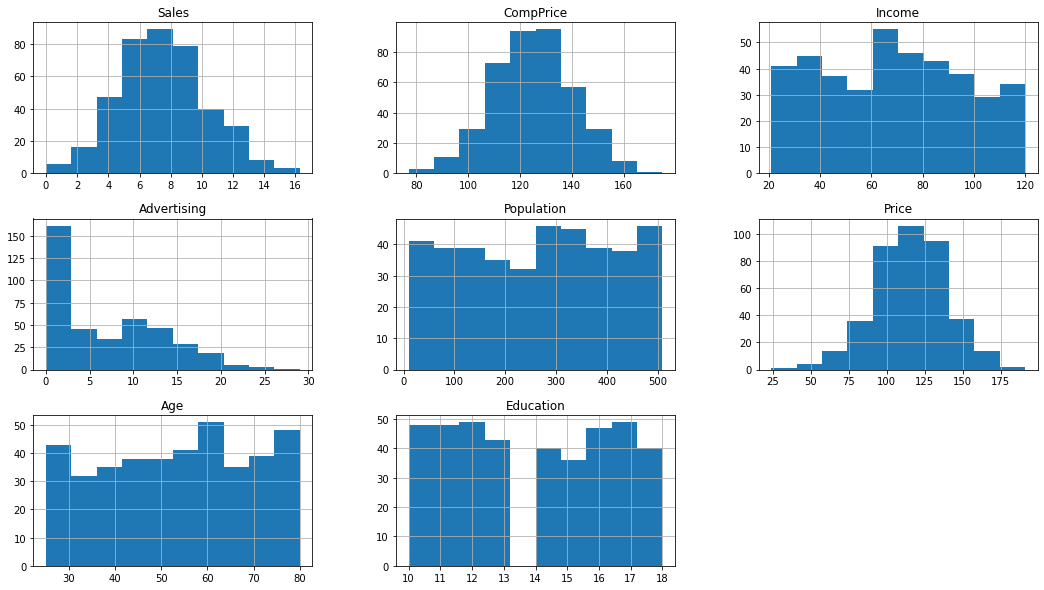

In [13]:
data.hist(['Sales', 'CompPrice','Income','Advertising','Population','Price','Age','Education'], figsize=(18,10))

In [14]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

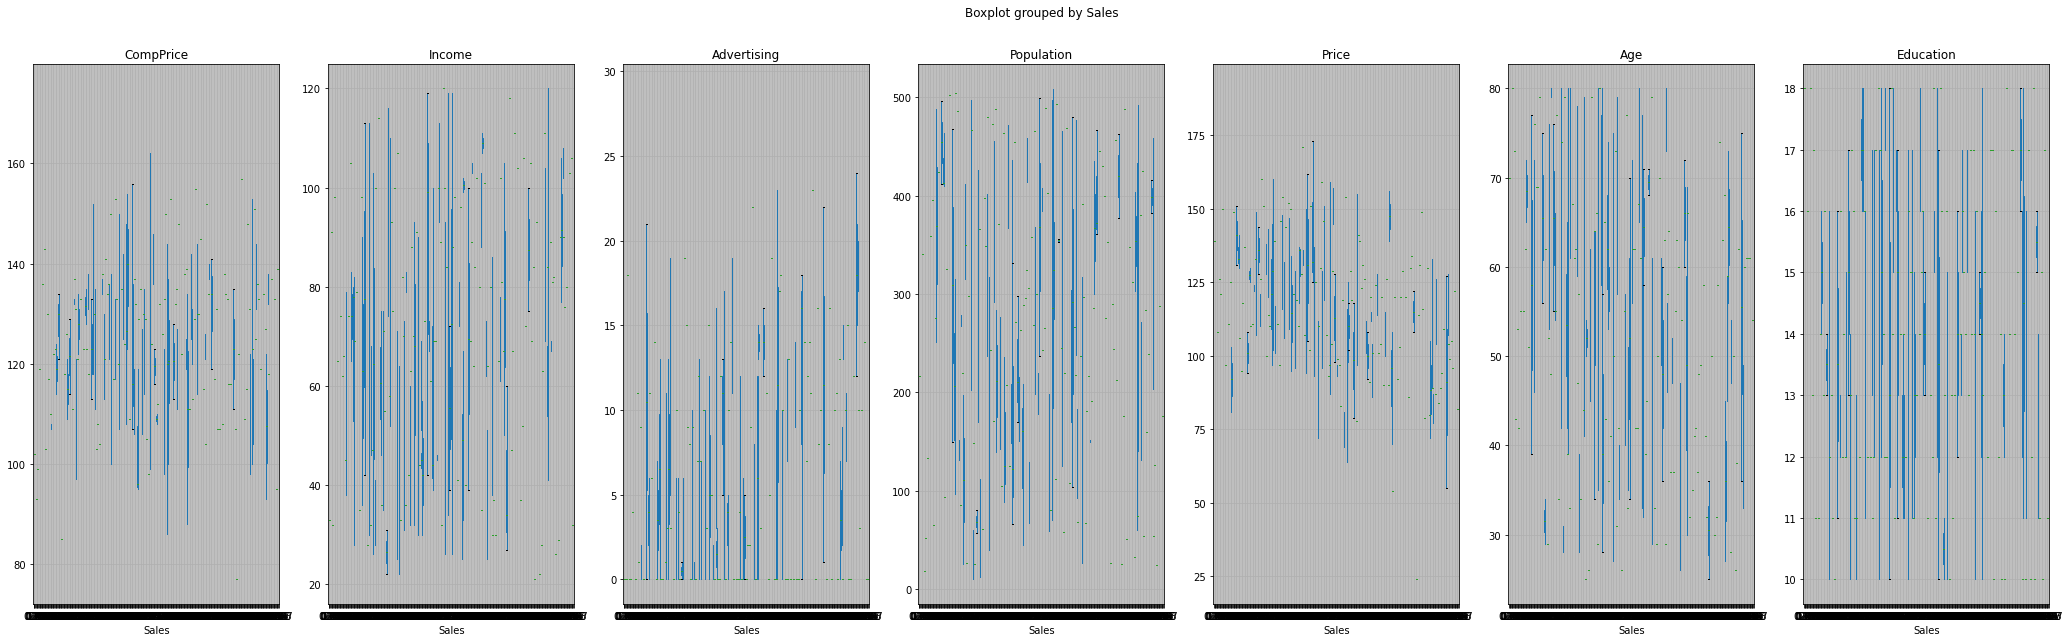

In [15]:
ContinuousColsList=['CompPrice','Income','Advertising','Population','Price','Age','Education']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(35,10))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol, by='Sales', figsize=(7,10), vert=True, ax=PlotCanvas[i])

In [16]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [17]:
ContinuousVariables=ContinuousColsList
FunctionAnova(inpData=data, TargetVariable='Sales', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

CompPrice is NOT correlated with Sales | P-Value: 0.8646316876572246
Income is NOT correlated with Sales | P-Value: 0.6391100922078781
Advertising is NOT correlated with Sales | P-Value: 0.23135655487010412
Population is NOT correlated with Sales | P-Value: 0.06372341076647661
Price is NOT correlated with Sales | P-Value: 0.13196663905847447
Age is NOT correlated with Sales | P-Value: 0.3608806775359288
Education is NOT correlated with Sales | P-Value: 0.6442421979808187


[]

In [18]:
CrossTabResult=pd.crosstab(index=data['ShelveLoc'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
ShelveLoc,,,,,,,,,,,,,,,,,,,,,
Bad,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Good,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
Medium,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
CrossTabResult=pd.crosstab(index=data['Urban'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
Urban,,,,,,,,,,,,,,,,,,,,,
No,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
Yes,0,0,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,1,0,1,1


In [20]:
CrossTabResult=pd.crosstab(index=data['Education'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
Education,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
11,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
18,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
CrossTabResult=pd.crosstab(index=data['US'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
US,,,,,,,,,,,,,,,,,,,,,
No,1,1,0,0,1,0,0,1,1,1,...,0,0,0,0,1,0,1,1,0,0
Yes,0,0,1,1,0,1,1,0,0,0,...,1,1,1,1,0,1,0,0,1,1


In [22]:
CrossTabResult=pd.crosstab(index=data['Age'], columns=data['Sales'])
CrossTabResult

Sales,0.00,0.16,0.37,0.53,0.91,1.42,1.82,2.05,2.07,2.23,...,13.28,13.36,13.39,13.44,13.55,13.91,14.37,14.90,15.63,16.27
Age,,,,,,,,,,,,,,,,,,,,,
25,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


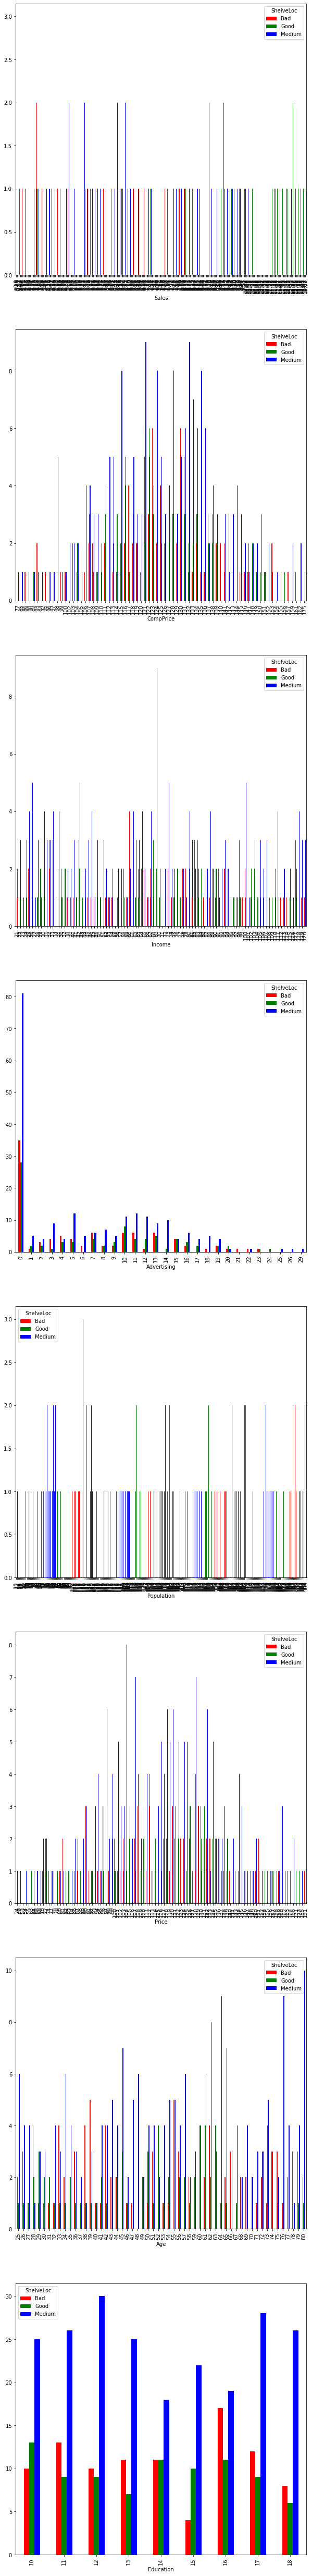

In [23]:
ColsList=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education']
CategoricalCol = ['Urban', 'US']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(ColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(ColsList, range(len(ColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['ShelveLoc'])
    CrossTabResult.plot.bar(color=['red','green','blue'], ax=PlotCanvas[i])

In [24]:
data['Urban'].replace({'Yes':1, 'No':0}, inplace=True)
data['US'].replace({'Yes':1, 'No':0}, inplace=True)
data['ShelveLoc'].replace({'Good':1, 'Bad':0,'Medium':2}, inplace=True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [25]:
X = data.drop('Income',axis=1)
y = data['Income']

In [26]:
X.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,11,276,120,0,42,17,1,1
1,11.22,111,16,260,83,1,65,10,1,1
2,10.06,113,10,269,80,2,59,12,1,1
3,7.40,117,4,466,97,2,55,14,1,1
4,4.15,141,3,340,128,0,38,13,1,0


In [27]:
y.head()

0     73
1     48
2     35
3    100
4     64
Name: Income, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor 
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestRegressor(max_depth=10, n_estimators=100)
# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
y_pred=RF.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,40.184356,44.846468,46.506917,47.372101,47.606114,48.985186,50.082352,50.223089,50.249667,51.216187,...,81.245229,82.506492,82.541984,83.202355,84.597619,84.780440,85.283802,87.991131,89.933234,91.332372
Actual Result,,,,,,,,,,,,,,,,,,,,,
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27.987043127939014
Mean Squared Error: 1057.0025623372244
Root Mean Squared Error: 32.5115758205785


In [32]:
from sklearn.ensemble import RandomForestClassifier 
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100)
# Creating the model on Training Data
RFC=clf.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

          21       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       3.0
          25       0.00      0.00      0.00       2.0
          26       0.00      0.00      0.00       3.0
          27       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       2.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       3.0
          31       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       3.0
          33       0.00      0.00      0.00       4.0
          34       0.00      0.00      0.00       0.0
          35       0.00      0.00      0.00       2.0
          36       0.00      0.00      0.00       2.0
          37       0.00      0.00      0.00       3.0
          38   


Accuracy values for 10-fold Cross Validation:
 [nan nan nan nan nan]

Final Average Accuracy of the model: nan


<AxesSubplot:>

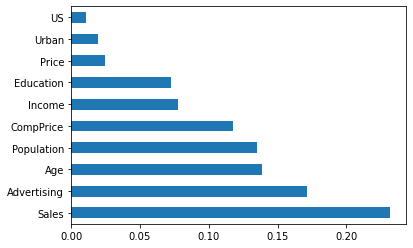

In [34]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US'])
feature_importances.nlargest(10).plot(kind='barh')

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

          21       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       3.0
          24       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       2.0
          26       0.00      0.00      0.00       3.0
          27       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       2.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       3.0
          31       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       3.0
          33       0.00      0.00      0.00       4.0
          35       0.00      0.00      0.00       2.0
          36       0.00      0.00      0.00       2.0
          37       0.00      0.00      0.00       3.0
       


Accuracy values for 10-fold Cross Validation:
 [0.00625    0.         0.         0.00884615 0.00625   ]

Final Average Accuracy of the model: 0.0


<AxesSubplot:>

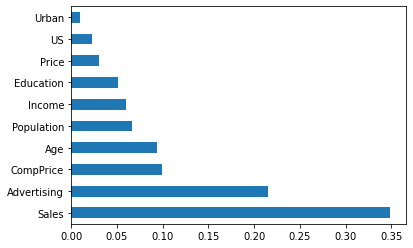

In [36]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US'])
feature_importances.nlargest(10).plot(kind='barh')